# **1D Heat Conduction** 
***

### **1. Introduction**
The fall of a skydiver is a classic problem in fluid dynamics and Newtonian mechanics. When moving through the atmosphere, the motion is governed by two main forces: gravity, which accelerates the body downward, and aerodynamic drag, which opposes the motion.

The **goal** is to determine the speed of the fall and how it is affected by air drag and by the parachute once it opens.

### **2. Assumptions and simplifications**
This project implements numerical models of this phenomenon, solving the differential equation of motion under two common approximations: 

* **Linear drag:** force ∝ velocity.
* **Quadratic drag:** force ∝ velocity². 

These models simulate the evolution of the skydiver's velocity and position, as well as the sudden change in dynamics after the parachute opens.

### **3. Mathematical Formulation**
Based on Newton's second law, which explains how the acceleration of a body depends on two variables: the net force applied to the object **F** and the mass **m** of the object.
$$ F = ma $$
Here the acceleration is cleared: 
$$ a = \frac{F}{m} $$
Acceleration can also be expressed as the rate at which velocity changes with time.
$$ a = \frac{dv}{dt} = \frac{F}{m} $$
The forces acting on the body are those produced by gravity and drag.
$$ F = W - F_{drag} $$
$$ \frac{dv}{dt} = \frac{W - F_{drag}}{m} $$
And the drag force can be expressed in two ways: 
* Linear drag
$$ F_{drag} = -cv $$
where **c** is the drag coefficient.

* Quadratic drag
$$ F_{drag} = -cv^2 $$
This is a more realistic approximation.

### **4. Solution using Euler's method**
The Euler method approximates the solution of an ODE by constructing the tangent at a given point and using it to estimate the value of the function at the next point. And the general formula is:
$$ \frac{dv}{dt} \approx \frac{\Delta v}{\Delta t} = \frac{v_{t_{i+1}} - v_{t_i}}{t_{i+1} - t_i} $$
where $ t_{t_i} $ is the current value of velocity at the time $ t_i $, and $ v_{t_{i+1}} $ is the next value.

Substituting into the equation above, we obtain:
$$ \frac{v_{t_{i+1}} - v_{t_i}}{t_{i+1} - t_i} = \frac{W - F_{drag}}{m} = \frac{mg - cv_{t_i}}{m} = g - \frac{c}{m}v_{t_i}$$
$$ v_{t_{i+1}} = v_{t_{i}} + (g - \frac{c}{m}v_{t_i})(t_{i+1} - t_i)$$


## **Python Implementation**
***

### **1. Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots 

### **2. Parameters**

In [2]:
# Convention: v > 0 Downward, y > 0 Upward  -> y decreases as it falls
g = 9.81          # m/s^2
m = 80.0          # kg

# Lineal drag: Fd = c * v
c1 = 10.0         # N·s/m before opening
c2 = 60.0         # N·s/m after opening

# Quadratic opening: Fd = k * v |v|
# Sets target terminal velocities and deduces k = m*g / v_inf^2
v_inf1 = 55.0     # m/s without parachute
v_inf2 = 6.0      # m/s with parachute
k1 = m*g/(v_inf1**2)
k2 = m*g/(v_inf2**2)

# Simulation conditions
t_open = 10.0     # s, Opening moment
t_end  = 60.0     # s, Total time of simulation
dt     = 0.02     # s, Time step
y0     = 600.0    # m, Initial height
v0     = 0.0      # m/s, Initial velocity

### **3. Temporal mesh**

In [3]:
t = np.arange(0.0, t_end + 1e-12, dt)

### **4. Solving numerically**

In [4]:
def simulate_linear(t, y0, v0, c_before, c_after, t_open):
    v = np.zeros_like(t)
    y = np.zeros_like(t)
    v[0] = v0
    y[0] = y0
    for i in range(1, len(t)):
        c = c_before if t[i-1] < t_open else c_after
        dv = (g - (c/m)*v[i-1]) * dt
        v[i] = v[i-1] + dv
        y[i] = y[i-1] - v[i-1]*dt 
        # Stop at ground
        if y[i] <= 0:
            y[i] = 0.0
            v[i] = v[i]  # hold the last value
            # Fill with the last value
            y[i+1:] = 0.0
            v[i+1:] = v[i]
            break
    return y, v

def simulate_quadratic(t, y0, v0, k_before, k_after, t_open):
    v = np.zeros_like(t)
    y = np.zeros_like(t)
    v[0] = v0
    y[0] = y0
    for i in range(1, len(t)):
        k = k_before if t[i-1] < t_open else k_after
        dv = (g - (k/m)*v[i-1]*abs(v[i-1])) * dt
        v[i] = v[i-1] + dv
        y[i] = y[i-1] - v[i-1]*dt
        if y[i] <= 0:
            y[i] = 0.0
            v[i] = v[i]
            y[i+1:] = 0.0
            v[i+1:] = v[i]
            break
    return y, v

# Execute simulations
y_lin, v_lin = simulate_linear(t, y0, v0, c1, c2, t_open)
y_quad, v_quad = simulate_quadratic(t, y0, v0, k1, k2, t_open)


### **5. Plotting results**

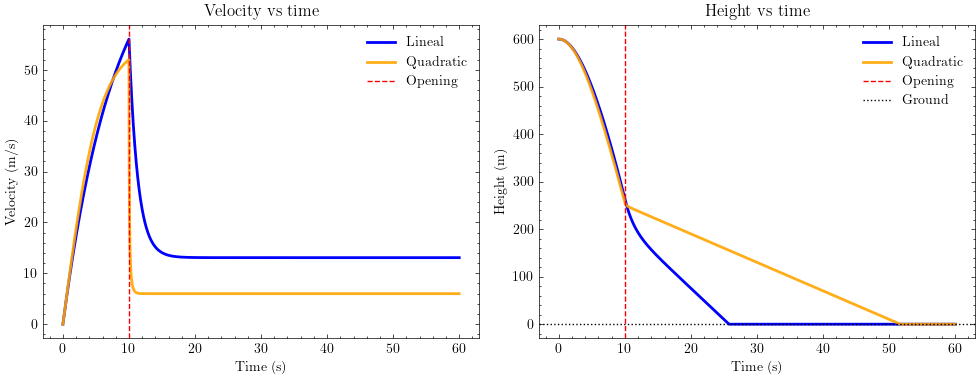

In [5]:
with plt.style.context('science','nature'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4),sharex=True)

    # Subplot Velocity
    ax = axes[0]
    ax.plot(t, v_lin, label='Lineal', linewidth=2, color = 'blue')
    ax.plot(t, v_quad, label='Quadratic', linewidth=2, alpha=0.9, color = 'orange')
    ax.axvline(t_open, ls='--', label='Opening', color = 'red')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Velocity vs time')
    ax.legend()

    # Subplot Height
    ax = axes[1]
    ax.plot(t, y_lin, label='Lineal', linewidth=2, color = 'blue')
    ax.plot(t, y_quad, label='Quadratic', linewidth=2, alpha=0.9, color = 'orange')
    ax.axvline(t_open, ls='--', label='Opening', color = 'red')
    ax.axhline(0, ls=':', color='k', label='Ground')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Height (m)')
    ax.set_title('Height vs time')
    ax.legend()

    plt.tight_layout()
    plt.show()